<a href="https://colab.research.google.com/github/Tanadol123/Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# **Upload File**

In [ ]:
# If you use Google Colab, you can upload your CSV file using the following code:
from google.colab import files

uploaded = files.upload()

# Assuming the user uploads a single CSV file, get its name
if uploaded:
    uploaded_filename = list(uploaded.keys())[0]
    df = pd.read_csv(uploaded_filename)

Saving student_performance_updated_1000.csv to student_performance_updated_1000 (1).csv


In [ ]:
# If you are running this code in a local environment, you can read the CSV file directly using pandas:
df = pd.read_csv('student_performance_updated_1000.csv')

# Data Exploration

In [ ]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [ ]:
# see the total missing value for each column
df.isnull().sum()

,0
StudentID,40
Name,34
Gender,48
AttendanceRate,40
StudyHoursPerWeek,50
PreviousGrade,33
ExtracurricularActivities,43
ParentalSupport,22
FinalGrade,40
Study Hours,24


In [ ]:
# look at the overall value for every column
# we notice that Study Hours have a minimum value of -5 which is invalid
# and Attendance (%) of 200% which is also invalid
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


# Data Cleaning

In [ ]:
# Dropping the redundant column
# Why choose dropping "Attendance (%)" because it contains "invalid entries" (like 200%)
df.drop(columns=["Attendance (%)"], inplace=True)
df.drop(columns=["StudyHoursPerWeek"], inplace=True)

In [ ]:
# replace negative values in Study Hours with NA because it can either be a human error or a system error.
df.loc[df["Study Hours"] < 0, "Study Hours"] = np.nan

In [ ]:
# Drop rows with [FinalGrade] missing values, analyzing a row without it would be meaningless.
df.dropna(subset=['FinalGrade'], inplace=True)

Impute other relevent data

In [ ]:
# Impute missing values in 'StudyHoursPerWeek' with the median
median_study_hours = df['Study Hours'].median()
df['Study Hours'] = df['Study Hours'].fillna(median_study_hours)

In [ ]:
# Create a subset of the DataFrame where 'AttendanceRate' is missing
df_missing_attendance = df[df['AttendanceRate'].isnull()]

print("--- Descriptive Statistics for Rows with Missing AttendanceRate ---")
print(df_missing_attendance.describe())

print("\n--- Missing Values in Other Columns for Rows with Missing AttendanceRate ---")
print(df_missing_attendance.isnull().sum())

--- Descriptive Statistics for Rows with Missing AttendanceRate ---
         StudentID  AttendanceRate  PreviousGrade  ExtracurricularActivities  \
count    36.000000             0.0       36.00000                  35.000000   
mean   4275.000000             NaN       78.00000                   1.485714   
std    2483.971727             NaN        9.55286                   1.010865   
min       5.000000             NaN       60.00000                   0.000000   
25%    2084.500000             NaN       70.00000                   1.000000   
50%    4158.500000             NaN       80.00000                   1.000000   
75%    6232.500000             NaN       85.25000                   2.000000   
max    9248.000000             NaN       90.00000                   3.000000   

       FinalGrade  Study Hours  
count   37.000000    37.000000  
mean    82.189189     2.129730  
std      9.512675     1.282763  
min     62.000000     0.200000  
25%     78.000000     1.000000  
50%     87.00

In [ ]:
# This indicates that AttendanceRate doesn't appear to be strongly correlated with a large number
# of other missing values across many other attributes.
# Impute missing values in 'AttendanceRate' with the median
median_AttendanceRate = df['AttendanceRate'].median()
df['AttendanceRate'] = df['AttendanceRate'].fillna(median_AttendanceRate)

In [ ]:
# Impute missing values in 'PreviousGrade' with the median
median_previous_grade = df['PreviousGrade'].median()
df['PreviousGrade'] = df['PreviousGrade'].fillna(median_previous_grade)

In [ ]:
# Impute missing values in 'ExtracurricularActivities' with the median
median_extracurricular_activities = df['ExtracurricularActivities'].median()
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].fillna(median_extracurricular_activities)

In [ ]:
# Impute missing categprical values with 'Unknown'
df['Gender'] = df['Gender'].fillna('Unknown')
df['ParentalSupport'] = df['ParentalSupport'].fillna('Unknown')
df['Online Classes Taken'] = df['Online Classes Taken'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
StudentID,38
Name,33
Gender,0
AttendanceRate,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0
Study Hours,0
Online Classes Taken,0


# EDA

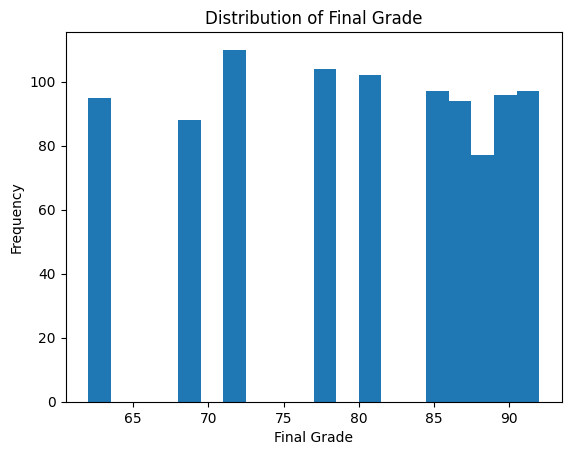

In [ ]:
# Distribution (Histogram)
# Most students score between 70 and 90
#
plt.hist(df["FinalGrade"], bins=20)
plt.title("Distribution of Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

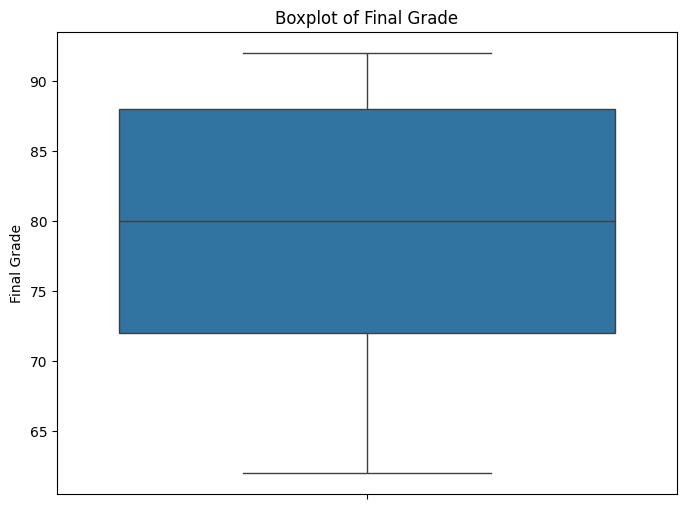

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['FinalGrade'])
plt.title('Boxplot of Final Grade')
plt.ylabel('Final Grade')
plt.show()

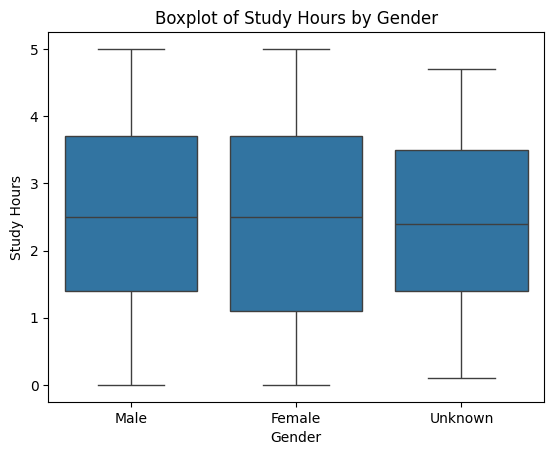

In [ ]:
import seaborn as sns

sns.boxplot(x='Gender', y='Study Hours', data=df)
plt.title("Boxplot of Study Hours by Gender")
plt.show()

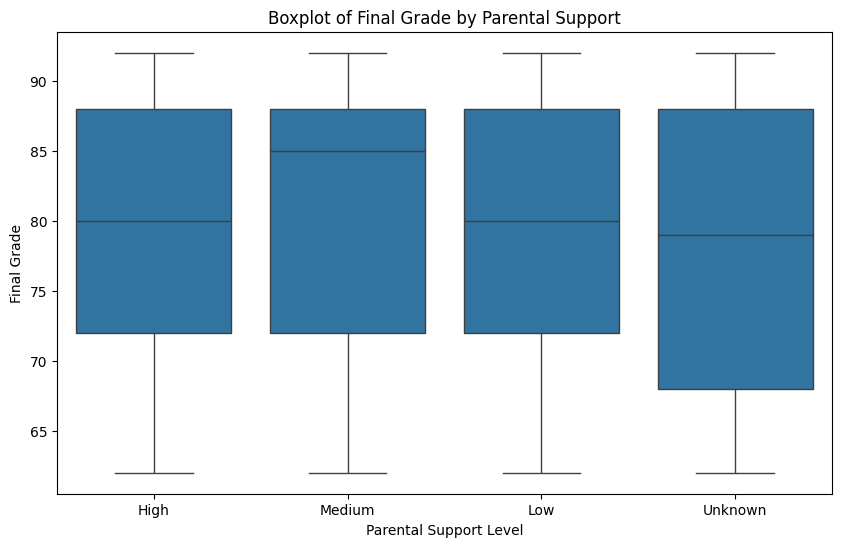

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df)
plt.title('Boxplot of Final Grade by Parental Support')
plt.xlabel('Parental Support Level')
plt.ylabel('Final Grade')
plt.show()

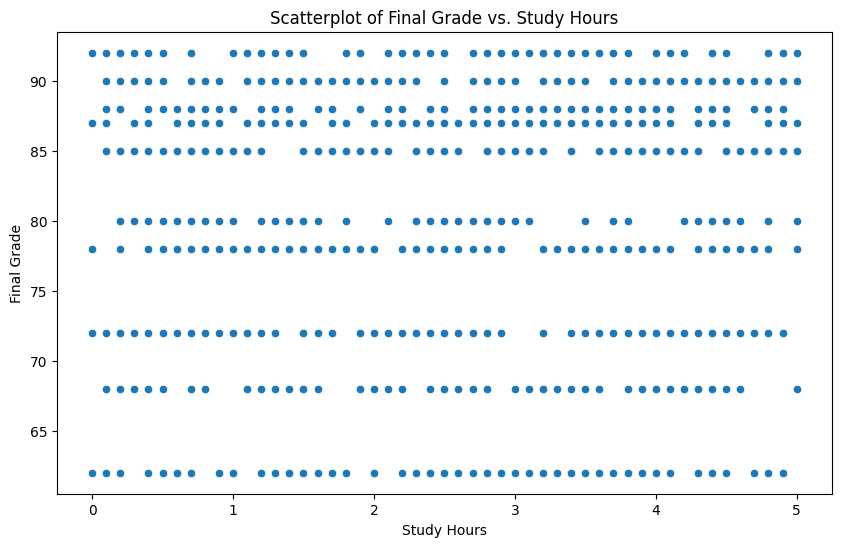

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study Hours', y='FinalGrade', data=df)
plt.title('Scatterplot of Final Grade vs. Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Final Grade')
plt.show()

# Descriptive Statistics

In [ ]:
df[["FinalGrade","Study Hours","AttendanceRate","ExtracurricularActivities"]].describe()

,FinalGrade,Study Hours,AttendanceRate,ExtracurricularActivities
count,960.000000,960.000000,960.000000,919.000000
mean,80.030208,2.478021,85.600000,1.516866
std,9.493652,1.420367,7.171837,1.049685
min,62.000000,0.000000,70.000000,0.000000
25%,72.000000,1.200000,82.000000,1.000000
50%,80.000000,2.500000,88.000000,1.000000
75%,88.000000,3.700000,91.000000,2.000000
max,92.000000,5.000000,95.000000,3.000000


In [ ]:
#mean
df["FinalGrade"].mean()

np.float64(80.03020833333333)

In [ ]:
#median
df["FinalGrade"].median()

80.0

In [ ]:
#Standard Diviation
df["FinalGrade"].std()

9.493652121996378

In [ ]:
#IQR
q1 = df["FinalGrade"].quantile(0.25)
q3 = df["FinalGrade"].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(16.0)

In [ ]:
df['ParentalSupport'].value_counts()

,count
ParentalSupport,
High,330
Medium,314
Low,294
Unknown,22


In [ ]:
df['Online Classes Taken'].value_counts()

,count
Online Classes Taken,
True,473
False,464
Unknown,23


# Basic Statistical Inference

In [ ]:
# Calculate mean, standard deviation, and sample size for FinalGrade
x_bar = df['FinalGrade'].mean()
s = df['FinalGrade'].std()
n = len(df['FinalGrade'])
z_score = 1.96     # 1.96 for a 95% confidence level

margin_of_error = z_score * (s / np.sqrt(n))

lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error

print(f"Sample Mean: {x_bar:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Sample Mean: 80.03
95% Confidence Interval: (79.43, 80.63)


In [ ]:
# Split the data into two groups based on 'Online Classes Taken'
group1 = df[df['Online Classes Taken'] == True]['FinalGrade']
group2 = df[df['Online Classes Taken'] == False]['FinalGrade']

# Run the independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"P-value: {p_value}")

P-value: 0.9488801934824369


In [ ]:
# Split the data into two groups based on 'Online Classes Taken'
group1 = df[df['Gender'] == 'Male']['FinalGrade']
group2 = df[df['Gender'] == 'Female']['FinalGrade']

# Run the independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"P-value: {p_value}")

P-value: 0.3036797396665164
